In [27]:
pip install pandas matplotlib


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



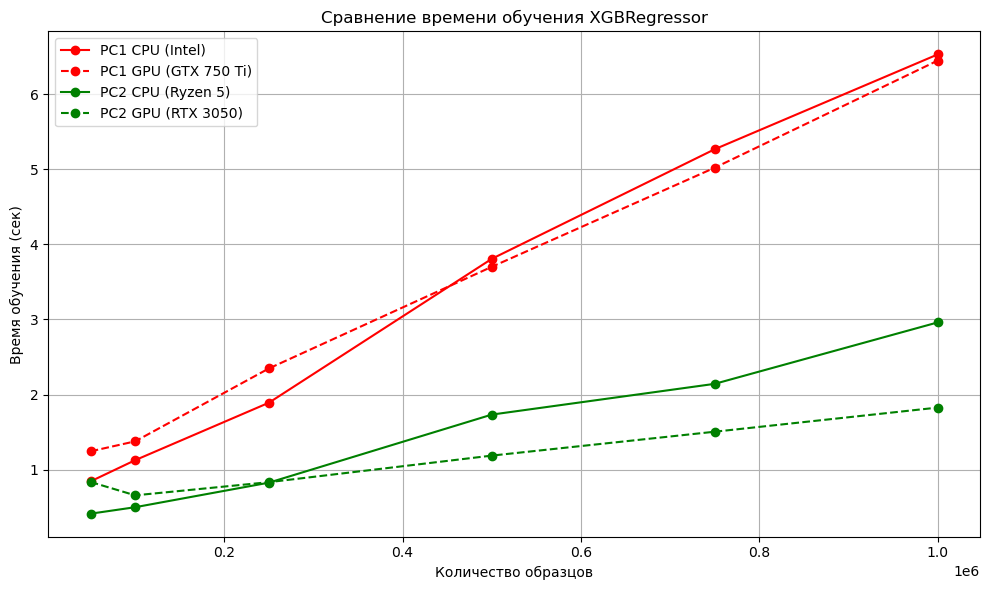


📊 Ускорение CPU PC2 vs PC1 (в процентах):
50000 samples: +50.91%
100000 samples: +55.55%
250000 samples: +56.24%
500000 samples: +54.46%
750000 samples: +59.3%
1000000 samples: +54.64%

⚡ Ускорение GPU PC2 vs PC1 (в процентах):
50000 samples: +32.78%
100000 samples: +52.17%
250000 samples: +64.47%
500000 samples: +67.9%
750000 samples: +70.0%
1000000 samples: +71.66%


In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# ======== ДАННЫЕ ========
samples = [50_000, 100_000, 250_000, 500_000, 750_000, 1_000_000]

# PC1: Intel CPU и GTX 750 Ti
pc1_cpu = [0.845, 1.127, 1.892, 3.8076, 5.2663, 6.528]
pc1_gpu = [1.2448, 1.3779, 2.3482, 3.7015, 5.0203, 6.446]

# PC2: Ryzen 5 3600 и RTX 3050
pc2_cpu = [0.4148, 0.501, 0.828, 1.7339, 2.1433, 2.9608]
pc2_gpu = [0.8368, 0.659, 0.8343, 1.188, 1.506, 1.827]

# ======== ГРАФИК ВРЕМЕНИ ОБУЧЕНИЯ ========
plt.figure(figsize=(10, 6))
plt.plot(samples, pc1_cpu, 'r-o', label="PC1 CPU (Intel)")
plt.plot(samples, pc1_gpu, 'r--o', label="PC1 GPU (GTX 750 Ti)")
plt.plot(samples, pc2_cpu, 'g-o', label="PC2 CPU (Ryzen 5)")
plt.plot(samples, pc2_gpu, 'g--o', label="PC2 GPU (RTX 3050)")
plt.xlabel("Количество образцов")
plt.ylabel("Время обучения (сек)")
plt.title("Сравнение времени обучения XGBRegressor")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Сохраняем график
plt.savefig("xgb_fit_comparison.png", dpi=300)  # можно изменить имя и dpi

plt.show()

# ======== УСКОРЕНИЕ PC2 ОТНОСИТЕЛЬНО PC1 (в %) ========
def calc_speedup(old, new):
    return [round((o - n) / o * 100, 2) for o, n in zip(old, new)]

cpu_speedup = calc_speedup(pc1_cpu, pc2_cpu)
gpu_speedup = calc_speedup(pc1_gpu, pc2_gpu)

# Вывод ускорения
print("\n📊 Ускорение CPU PC2 vs PC1 (в процентах):")
for s, sp in zip(samples, cpu_speedup):
    print(f"{s} samples: +{sp}%")

print("\n⚡ Ускорение GPU PC2 vs PC1 (в процентах):")
for s, sp in zip(samples, gpu_speedup):
    print(f"{s} samples: +{sp}%")


Вывод:
CPU на PC2 быстрее почти в 2 раза, особенно на больших выборках.
GPU: на миллион строк RTX 3050 обучает модель в 3.5 раза быстрее, чем старенькая GTX 750 Ti.